# Random forest vs decision tree 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [22]:
df=pd.read_csv("D:\jupyter notebook projects\Data\Position_Salaries.csv")

In [23]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


<AxesSubplot:>

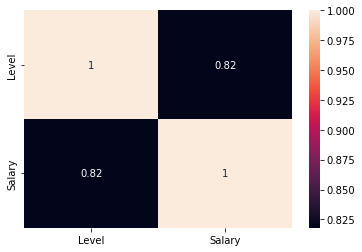

In [24]:
sns.heatmap(data=df.corr(),   annot=True)

In [25]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
df['Position']=L.fit_transform(df['Position'])

In [26]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [27]:
df

,Position,Level,Salary
0,0,1,45000
1,4,2,50000
2,8,3,60000
3,5,4,80000
4,3,5,110000
5,7,6,150000
6,6,7,200000
7,9,8,300000
8,1,9,500000
9,2,10,1000000


<AxesSubplot:>

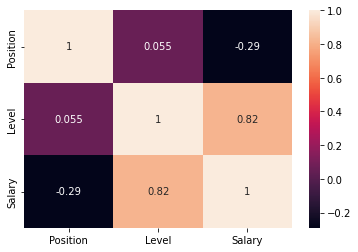

In [28]:
sns.heatmap(data=df.corr(),   annot=True)

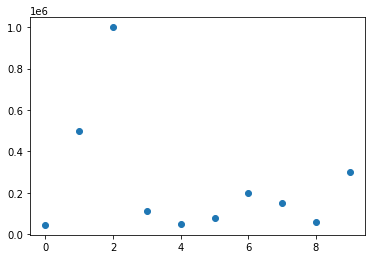

In [29]:
plt.scatter(df.Position,df['Salary'])

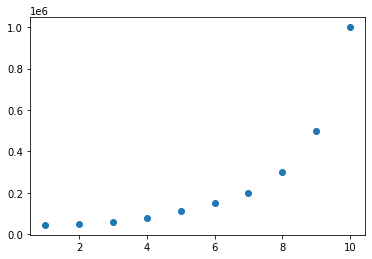

In [30]:
plt.scatter(df.Level,df['Salary'])

<AxesSubplot:xlabel='Level', ylabel='Salary'>

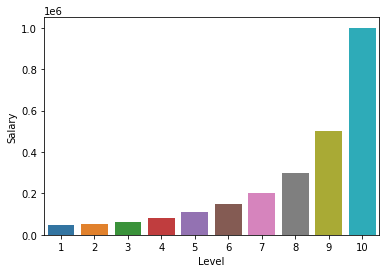

In [31]:
sns.barplot(data=df,x='Level',y='Salary')

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.1)

In [34]:
x_train

,Position,Level
8,1,9
4,3,5
9,2,10
1,4,2
6,6,7
7,9,8
3,5,4
0,0,1
5,7,6


# Training the Decision Tree Regression model 

In [35]:
df.drop(columns='Position',inplace=True)

In [36]:
df

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [43]:
X=df.iloc[:,:-1].values.reshape(-1,1)
Y=df.iloc[:,-1].values

In [46]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

# split and train

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=.1)

In [63]:
reg2=DecisionTreeRegressor(random_state=0)
reg2.fit(X,Y)

DecisionTreeRegressor(random_state=0)

# perdict

In [66]:
reg2.predict(([[6.5]]))

array([150000.])

## visualzation

In [67]:
x_grid=np.arange(min(X),max(X),.01)

In [68]:
x_grid=x_grid.reshape(len(x_grid),1)

In [69]:
x_grid.shape

(900, 1)

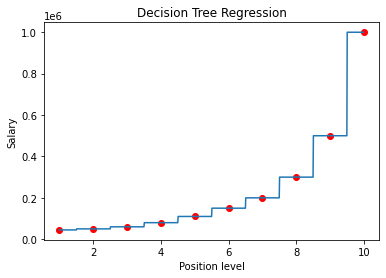

In [70]:
plt.scatter(X,Y,color='red')
plt.plot(x_grid,reg2.predict(x_grid))
plt.title('Decision Tree Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# now try random forest model

In [78]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=5,random_state=0)
reg.fit(X,Y)

RandomForestRegressor(n_estimators=5, random_state=0)

In [79]:
reg2.predict(([[6.5]]))

array([150000.])

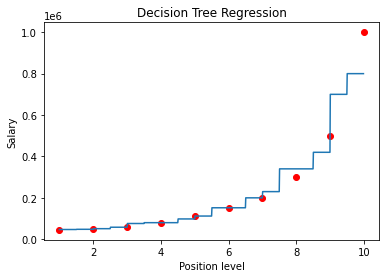

In [80]:
plt.scatter(X,Y,color='red')
plt.plot(x_grid,reg.predict(x_grid))
plt.title('Decision Tree Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [77]:
##it help us to avoid over fitting